# Dragon Real Estate House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir(r'C:/Users/raghu/Dragon house price prediction')

In [3]:
df = pd.read_csv("House price.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
##Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
#another way to check null value counts in each column
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286617,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.699117,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
##To get the grapghs here itself we use this
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

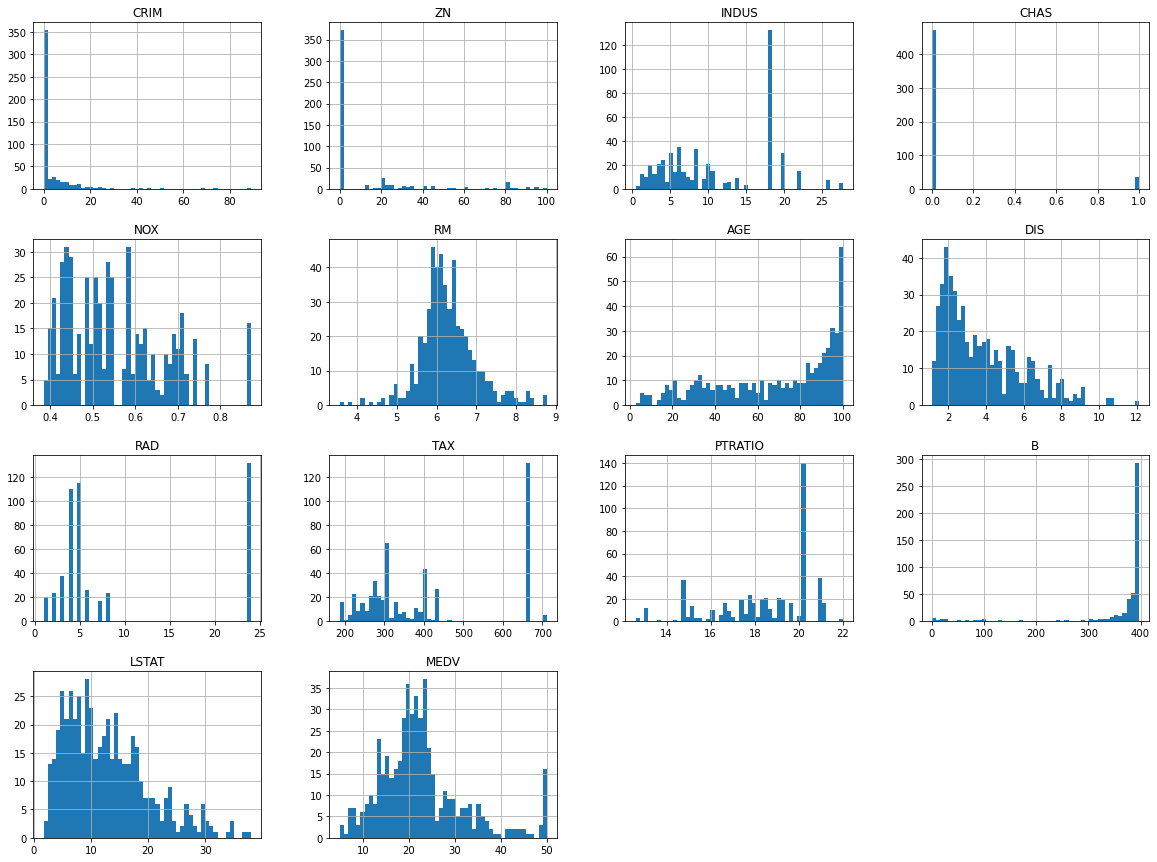

In [10]:
df.hist(bins = 50, figsize = (20,15))

# Train_Test_Split Mechanism 

In [11]:
#for understanding how train test split works

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    print(train_indices)
    return data.iloc[test_indices], data.iloc[train_indices] 

In [12]:
test_set, train_set = split_train_test(df, 0.2)

[ 75 477  15 332 423  19 325 335  56 437 409 334 181 227 434 180  25 493
 238 244 250 418 117  42 322 347 182 155 280 126 329  31 113 148 432 338
  57 194  24  17 298  66 211 404  94 154 441  23 225 433 447   5 116  45
  16 468 360   3 405 185  60 110 321 265  29 262 478  26   7 492 108  37
 157 472 118 114 175 192 272 144 373 383 356 277 220 450 141 369  67 361
 168 499 394 400 193 249 109 420 145  92 152 222 304  83 248 165 163 199
 231  74 311 455 253 119 284 302 483 357 403 228 261 237 386 476  36 196
 139 368 247 287 378  59 111  89 266   6 364 503 341 158 150 177 397 184
 318  10 384 103  81  38 317 167 475 299 296 198 377 146 396 147 428 289
 123 490  96 143 239 275  97 353 122 183 202 246 484 301 354 410 399 286
 125 305 223 422 219 129 424 291 331 380 480 358 297 294 370 438 112 179
 310 342 333 487 457 233 314 164 136 197 258 232 115 120 352 224 406 340
 127 285 415 107 374 449 133 367  44 495  65 283  85 242 186 425 159  12
  35  28 170 142 402 349 221  95  51 240 376 382 17

In [13]:
print("rows in test_set: ", len(test_set))
print("rows in train_set: ", len(train_set))

rows in test_set:  101
rows in train_set:  405


In [14]:
##This mecahnism which we saw above is already present in scikit learn module, lets call it out
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size = 0.2, random_state =42)

In [15]:
X_test.head()
X_test.shape

(102, 14)

In [16]:
X_train.head()
X_train.shape

(404, 14)

# Stratified Sampling

In [17]:
##Stratified sampling is used for making uniform distribution of dataset in test and train sets. 
##It ensures proper distribution of categorical features for training the model appropriately in order to get good predictions.
##We need to do it for every important categorical feature

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for Train_index, Test_index in split.split(df, df["CHAS"]):
    strat_train_set = df.loc[Train_index]
    strat_test_set = df.loc[Test_index]

In [19]:
strat_train_set["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [20]:
28/404

0.06930693069306931

In [21]:
strat_test_set["CHAS"].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [22]:
7/102

0.06862745098039216

In [23]:
df_train = strat_train_set
df_test = strat_test_set

In [24]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


# Looking for correlation

In [25]:
corr_met = df_train.corr()
corr_met['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.676847
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [26]:
import seaborn as sns

<AxesSubplot:>

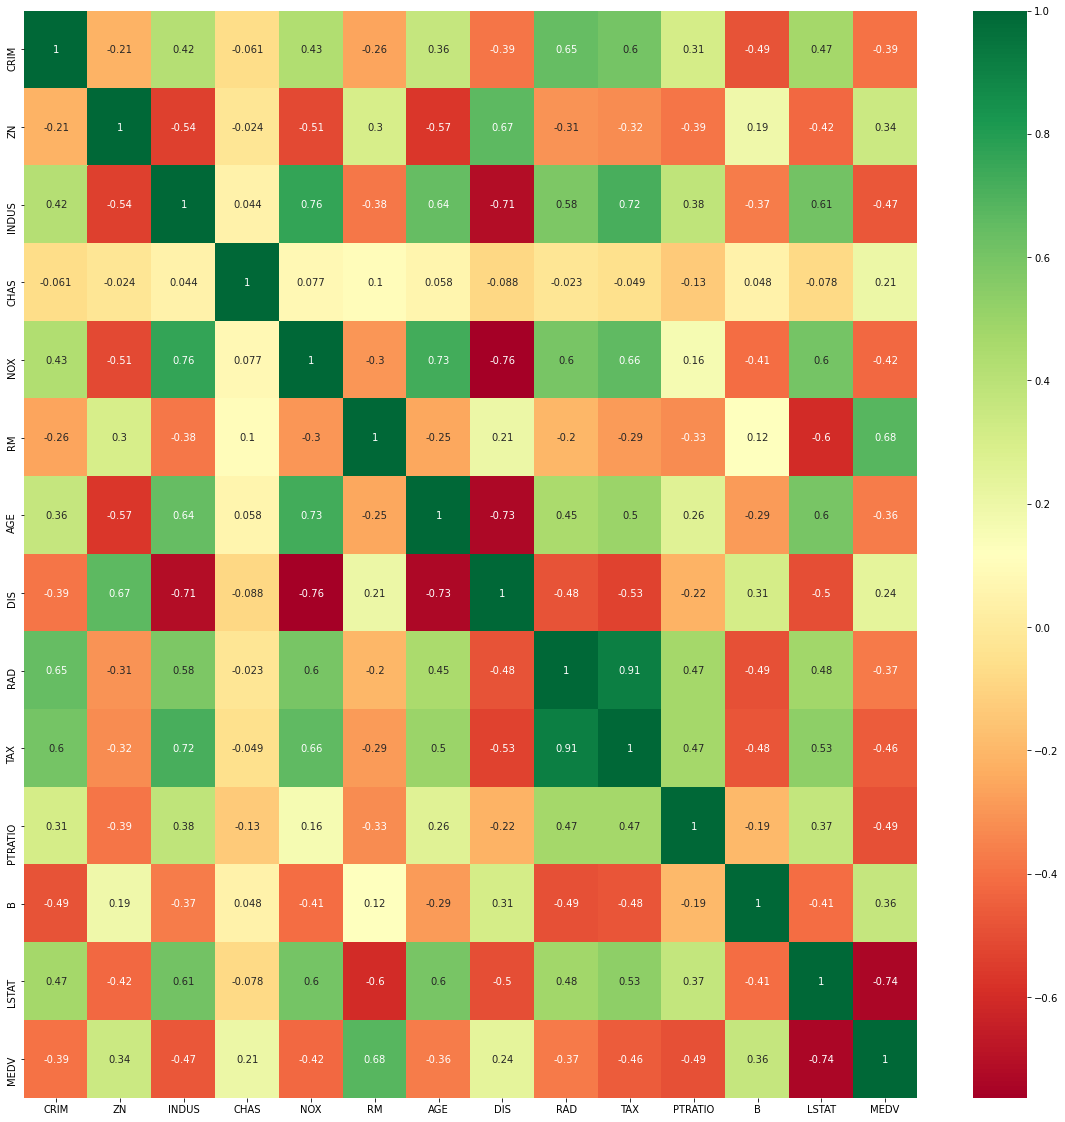

In [27]:
corr_met = df_train.corr()
corr_mat_features = corr_met.index
plt.figure(figsize = (20, 20))

sns.heatmap(df_train[corr_mat_features].corr(), annot = True, cmap = "RdYlGn")

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

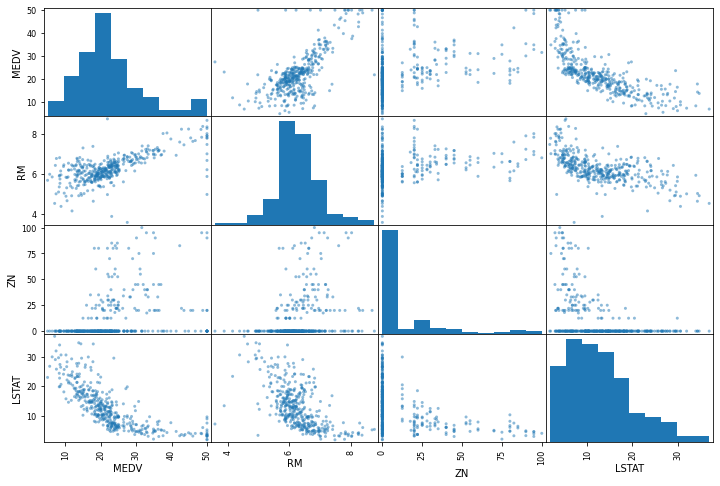

In [28]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(df_train[attributes], figsize = (12,8))

##from scatter_matrix we were able to find most correlated features for the label along with direction of correlation
##Then for in detail analysis, we did a plot with most correlated features 

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

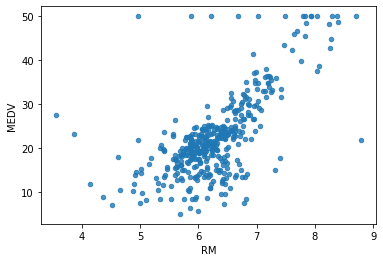

In [29]:
df_train.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)
##from this plot we were able to find the outliers
##Also, we found that price is capped at 50 lacs as we observed that price is same for house with 5 bedrooms and 9 bedrooms

In [30]:
df_train_features = df_train.drop(["MEDV"], axis = 1)
df_train_features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [31]:
df_train_labels = df_train["MEDV"]
df_train_labels.shape

(404,)

# Trying out Attribute Combination

In [32]:
df_train["TAXRM"] = df_train["TAX"]/df_train["RM"]

In [33]:
df_test["TAXRM"] = df_test["TAX"]/df_test["RM"]

In [34]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [35]:
corr_met = df_train.corr()
corr_met['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.676847
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.524720
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
 14  TAXRM    399 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 50.5 KB


# Data leakge

Data leakage refers to a problem where information about the holdout dataset, such as a test or validation dataset, is made available to the model in the training dataset. This leakage is often small and subtle but can have a marked effect on performance.

It is recommended that, we should perform data preprocessing tasks like scaling, missing value treatment etc. on training data only to avoid data leakage. We should split data into training and testing before performing data processing

Data preparation must be fit on the training dataset only. The process flow must be:
1. Split Data.
2. Fit Data Preparation on Training Dataset.
3. Apply Data Preparation to Train and Test Datasets.
4. Evaluate Models.

# Missing Attributes

In [37]:
#To take care of missing attributes, we have 3 options:
    #1. Remove the corresponding rows with the missing attributes --> if rows with missing points are only few, remove those rows with missing attributes
    #2. Remove the whole attribute/column --> if the column has low correlation with label or the most of the values of that column is missing, remove that column/attribute
    #3. Set the missing attributes with mean or mode or median --> Best approach in our case

In [38]:
#option
a = df.dropna(subset = ["RM"])
a.shape
#However, original df will remain unchaged as we have not used inplace = True for making permanent changes

(501, 14)

In [39]:
#option 2
df.drop("RM", axis = 1).shape
#However, original df will remain unchaged as we have not used inplace = True for making permanent changes

(506, 13)

In [40]:
#option 3
median_train = df_train["RM"].median()
median_train

6.211

In [41]:
df_train["RM"].fillna(median_train)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     6.211
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [42]:
median_test = df_test["RM"].median()
median_test

6.176

In [43]:
#Instead of the above manual method, we can implement automatic filling of missing values in all the columns through IMPUTING

# Imputing for missing value treatment

In [44]:
#Imputing is used for filing the missing values in data set automatically. 
#It fills the missing values in each column with selected strategy

In [45]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(df_train_features) #fitting imputer for df_train (all the columns)

SimpleImputer(strategy='median')

In [46]:
#checking median calculated by imputer for all the columns
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [47]:
#15 columns
imputer.statistics_.shape

(13,)

In [48]:
#Storing a transformed dataset(in the form of array) into a variable X 
X = imputer.transform(df_train_features)

In [49]:
#converting array-form dataset into proper dataset
X_transformed = pd.DataFrame(X, columns=df_train_features.columns)

In [50]:
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


# Feature Scaling

Feature scaling is required only in linera reg, logistic reg, KNN. but not required in decision tree, random forest, naive bayers

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step

Scaling iis very useful in distance based algorithms like KNN, K-mean, SVC as they measure distance for prediction. So, there is a probability thet more weightage will be given to the feature with high magnitude. i.e. among Employee's CGPA (ranging from 0 to 5)and Salary (60k to 100K), Salary may get higher weightage while predicting. So, in order to normalize each feature to the same scale, Feature Scaling is used.


Primarily, there are 2 types of feature scaling methods:

1. Normalization or Min-Max Scaling: (value-min)/(max-min)
    For this, sklearn provides a class called MinMaxScalar

2. Standardization: (value - mean)/std
    For this, Sklearn provides a class called StandardScalar 

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution.

# Creating a Pipeline

Everything in preprocessing and transformation of training dataset should be under pipeline like Imputing for missing value treatment, scaling etc. 

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    #..... add as many as you want in your pipeline
    ('Std_Scalar', StandardScaler())
    
])

In [52]:
df_train_pipeline = my_pipeline.fit_transform(df_train_features)

In [53]:
df_train_pipeline

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [54]:
df_train_pipeline.shape

(404, 13)

In [55]:
df_train_labels.head()

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

# Scikit learn Design

Primarily, it has 3 types of objects:
1. Estimators- It estimates some parameter based on the dataset i.e. SimpleImputer(). It has fit method, which fits the data from dataset into estimator and calculate the desired parameter. It also has transform method, which transform the fitted data into numpy arrays. Transofrm means prepare the data with fitted values like we did in imputer above.

2. Transformers- It takes input and return output based on the learnings from fit(). It also has convenience function fit_transform(), which fits the data along with transformation of dataset.

3. Predictors - like LinearRegression(). It predicts the data after learning from fit(). It also give score() to evaluate the predictions.

# Selecting a desired model

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(df_train_pipeline, df_train_labels)

RandomForestRegressor()

In [57]:
some_data = df_train_features.iloc[0:5]
some_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [58]:
some_labels = df_train_labels[0:5]
some_labels.head()

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [59]:
prepared_data = my_pipeline.transform(some_data)
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24654144, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.50251167, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28788734,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.1343812 , -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.0434146 , -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

In [60]:
model.predict(prepared_data)

array([22.411, 25.531, 16.506, 23.473, 23.42 ])

In [61]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the Model

In [62]:
from sklearn.metrics import mean_squared_error
mod_predictions = model.predict(df_train_pipeline)
lin_mse = mean_squared_error(df_train_labels, mod_predictions)
lin_rmse = np.sqrt(lin_mse)

In [63]:
lin_rmse

1.1813834376410872

# Using better evaluation technique - Cross Validation

In [64]:
# model divide dataset into k fold. for instance, 10 fold. Then the buckets would be created like 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
# Then at first, model gets trained on 2 to 10 data buckets except 1, and get tested on 1
# Similarly, model gets trained on 1 to 10 data buckets except 2nd, and get tested on 2
# Similarly, model gets trained on 1 to 10 data buckets except 3rd, and get tested on 3. It continues till 10th get tested 

In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df_train_pipeline, df_train_labels, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [66]:
rmse_scores

array([2.8478314 , 2.83253833, 4.61375538, 2.63726944, 3.06574855,
       2.90083383, 4.70707088, 3.39681078, 3.12295903, 4.00777289])

In [67]:
def print_scores(scores):
    print("scores: ", scores)
    print("scores_mean: ", scores.mean())
    print("scores_std: ", scores.std())

In [68]:
print_scores(rmse_scores)

scores:  [2.8478314  2.83253833 4.61375538 2.63726944 3.06574855 2.90083383
 4.70707088 3.39681078 3.12295903 4.00777289]
scores_mean:  3.413259051062634
scores_std:  0.7208037081230111


In [69]:
# DecisionTreeRegressor
#scores_mean:  4.784233039854066
#scores_std:  1.0589028265041496

In [70]:
#Linear Regression
#scores_mean:  5.071224403109563
#scores_std:  1.0837363356831435

In [71]:
#RandomForestRegressor
#scores_mean:  3.413259051062634
#scores_std:  0.7208037081230111

Quiz: Convert this notebook into a python file and run the pipeline in Visual Studio Code

## Saving the Model

In [72]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

# Testing the Model

In [73]:
df_test.shape

(102, 15)

In [74]:
df_test_features = df_test.drop(["MEDV", "TAXRM"], axis = 1)
df_test_features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [75]:
df_test_labels = df_test["MEDV"]
df_test_labels.shape

(102,)

In [77]:
df_test_prepared = my_pipeline.transform(df_test_features)
df_test_prepared 

array([[-0.44228927, -0.4898311 , -1.37640684, ..., -1.21003475,
         0.38110555, -0.57309194],
       [ 1.76329132, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.42050096,  1.24376169],
       [-0.36938851, -0.4898311 , -0.74897749, ..., -0.50468552,
         0.45343469, -0.71838488],
       ...,
       [-0.43875128,  0.45939847, -0.83049963, ..., -0.78682521,
         0.45343469, -1.0394131 ],
       [-0.43651996, -0.4898311 ,  2.08246124, ...,  0.29471027,
         0.25301836,  0.20457123],
       [-0.43169386, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.45343469,  0.70963717]])

In [78]:
test_predict = model.predict(df_test_prepared)
test_mse = mean_squared_error(df_test_labels, test_predict)
test_rmse = np.sqrt(test_mse)

In [79]:
test_rmse

2.921962585821586

In [80]:
test_predict

array([24.164, 11.617, 25.346, 22.206, 18.062, 15.107, 19.945, 14.521,
       31.745, 39.683, 19.936, 11.698, 23.787, 25.995, 19.583, 10.631,
       31.734, 14.367, 23.803, 18.842, 19.995, 17.833, 16.161, 22.04 ,
       18.145, 31.954, 16.308, 34.104,  8.958, 33.579, 23.641, 21.121,
       23.246, 10.893, 20.783, 11.346, 41.824, 24.34 , 23.872, 41.397,
       23.621, 29.294, 20.493, 20.613, 19.126, 33.444, 44.633, 19.908,
       20.243, 21.852, 21.264, 14.743, 21.166, 15.058, 24.464, 32.831,
       42.059, 29.84 , 19.401, 20.87 , 47.143,  9.914, 18.912, 24.723,
       15.074, 32.531, 19.262, 18.021, 18.892, 34.438, 28.671, 22.985,
       21.437, 22.429, 35.86 , 12.84 , 15.968, 19.982, 20.598, 21.586,
       22.25 , 21.131, 14.149, 22.705, 20.588, 21.179, 14.173, 21.244,
       22.021, 23.152, 18.517, 26.699,  7.382, 25.747, 18.774, 30.127,
       20.577, 30.936, 14.477, 26.831, 21.053, 20.443])

In [83]:
print(list(df_test_labels))

[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.2, 11.9, 11.7, 21.6, 19.7, 23.0, 16.7, 21.7, 20.6, 23.3, 19.6, 28.0, 5.0, 24.4, 20.8, 24.8, 21.8, 23.6, 19.0, 25.0, 20.3, 21.5]


In [85]:
df_test_prepared[0]

array([-0.44228927, -0.4898311 , -1.37640684, -0.27288841, -0.34321545,
        0.36748312, -0.33092752,  1.20235683, -1.0016859 ,  0.05733231,
       -1.21003475,  0.38110555, -0.57309194])

In [88]:
df_test_prepared

array([[-0.44228927, -0.4898311 , -1.37640684, ..., -1.21003475,
         0.38110555, -0.57309194],
       [ 1.76329132, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.42050096,  1.24376169],
       [-0.36938851, -0.4898311 , -0.74897749, ..., -0.50468552,
         0.45343469, -0.71838488],
       ...,
       [-0.43875128,  0.45939847, -0.83049963, ..., -0.78682521,
         0.45343469, -1.0394131 ],
       [-0.43651996, -0.4898311 ,  2.08246124, ...,  0.29471027,
         0.25301836,  0.20457123],
       [-0.43169386, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.45343469,  0.70963717]])

In [87]:
df_test_labels

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64